In [1]:
import time
notebook_start = time.time()

## CIFAR-10 DATASET
### 0: Airplane
### 1: automobile
### 2: bird
### 3: cat
### 4: deer
### 5: dog
### 6: frog
### 7: horse
### 8: ship
### 9: truck

In [2]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras import layers
from keras.models import Model
from keras.optimizers import SGD
from keras.regularizers import l2
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.models import load_model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
x_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [5]:
x_test.shape, y_test.shape

((10000, 32, 32, 3), (10000, 1))

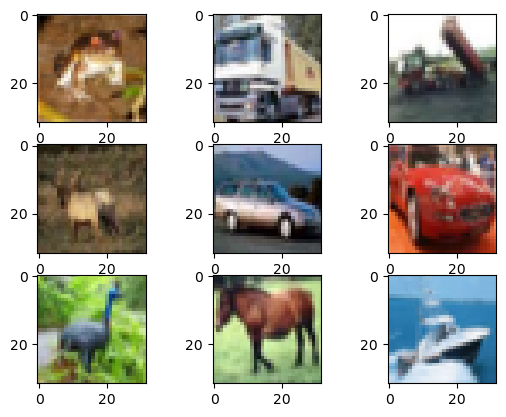

In [6]:
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i])
plt.show()

In [7]:
def load_dataset():
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()
    y_train = tf.keras.utils.to_categorical(y_train)
    y_test = tf.keras.utils.to_categorical(y_test)
    return x_train, y_train, x_test, y_test

In [8]:
def data_preprocessing(x_train, x_test):
    x_train = x_train / 255.0
    x_test = x_test / 255.0
    return x_train, x_test

In [9]:
def define_model():
    model = tf.keras.Sequential()
    
    return model

In [10]:
def visualize_model(history):
    plt.subplot(211)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='orange', label='test')

    plt.subplot(212)
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='orange', label='test')

    plt.show()

    filename = sys.argv[0].split('/')[-1]
    plt.savefig(filename + '_plot.png')
    plt.close()

In [11]:
def define_model():
    model = tf.keras.Sequential()
    # block 1
    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # block 2
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # block 3
    model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten
    model.add(Flatten())

    # Hidden Layers
    model.add(Dense(units=128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(units=10, activation='softmax'))

    # Compile model using Stochiastic Gradient Descent
    opt = SGD(momentum=0.9)
    model.compile(optimizer=opt, loss=loss, metrics=['accuracy'])
    return model

In [12]:
def run_test_harness(epochs=100, batches=64):
    start = time.time()
    x_train, y_train, x_test, y_test = load_dataset()
    x_train, x_test = data_preprocessing(x_train, x_test)
    model = define_model()
    history = model.fit(x=x_train, 
                        y=y_train, 
                        epochs=epochs, 
                        batch_size=batches, 
                        validation_data=(x_test, y_test), 
                        verbose=0)
    _, acc = model.evaluate(x=x_test, y=y_test, verbose=0)

    end = time.time()
    seconds = end - start

    print('> Test Accuracy: %.3f' % (acc * 100))
    print(f'> Test Harness Run Time: {seconds} seconds ({seconds/60} minutes)')

    visualize_model(history=history)

In [13]:
loss = 'categorical_crossentropy'

> Test Accuracy: 72.870
> Test Harness Run Time: 2130.318589925766 seconds (35.5053098320961 minutes)


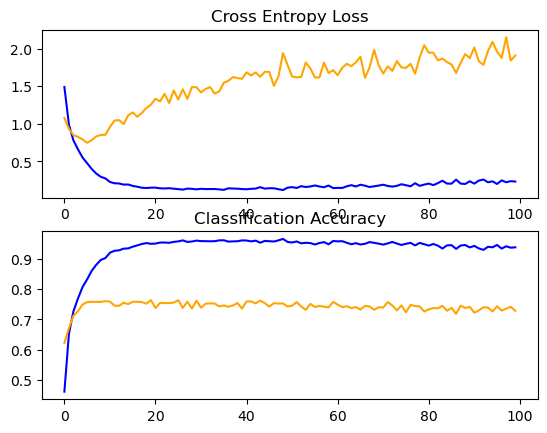

In [46]:
run_test_harness()

## Düzenlileştirme (Regularization)
### Bırakma düzenlileştirmesi yapacağız. Kısaca, modelin aşırı uyumunu önlemek için katmanlardaki bireysel nöronları rastgele bırakmaktır.

In [14]:
def define_model():
    model = tf.keras.Sequential()

    # block 1
    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(rate=0.2))

    # block 2
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(rate=0.2))

    # block 3
    model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(rate=0.2))

    # Flatten
    model.add(Flatten())

    # Hidden Layers
    model.add(Dense(units=128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(rate=0.2))
    model.add(Dense(units=10, activation='softmax'))

    # compile model using stochiastic gradient descent
    opt = SGD(momentum=0.9)
    model.compile(optimizer=opt, loss=loss, metrics=['accuracy'])
    return model

> Test Accuracy: 80.640
> Test Harness Run Time: 2273.232340812683 seconds (37.88720568021139 minutes)


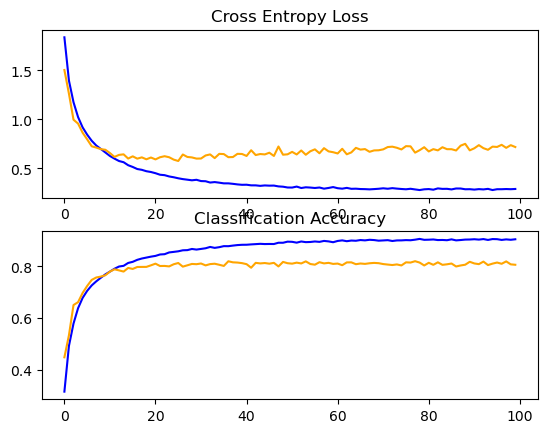

In [49]:
run_test_harness()

## Veri Zenginleştirme (Data Augmentation)
### Bilgisayarlı görünün zorluklarından birisi sağlam bir veri seti üzerinde çalışabilmektir. Bunun için mevcut verilerimiz üzerinde döndürme, aynalama, kaydırma, zoomlama ve kesme gibi işlemler yaparak mevcut verilerimizi yapay olarak değiştirebilir ve yeni veriler oluşturabiliriz. Bu yöntem, overfitting'i engellemeyi ve daha genel bir sonuç elde etmeyi amaçlar.

In [15]:
def run_augmented_test_harness(epochs=100, batches=64, save_name='default'):
    start = time.time()
    x_train, y_train, x_test, y_test = load_dataset()
    x_train, x_test = data_preprocessing(x_train, x_test)
    model = define_model()
    datagen = ImageDataGenerator(width_shift_range=0.1,
                                 height_shift_range=0.1,
                                 horizontal_flip=True,
                                 rotation_range=20,
                                 shear_range=0.1)
    train_iter = datagen.flow(x_train, y_train, batch_size=batches)

    steps = int(x_train.shape[0] / 64)
    history = model.fit(train_iter, 
                        steps_per_epoch=steps, 
                        epochs=epochs, 
                        validation_data=(x_test, y_test), 
                        verbose=0)
    model.save(f'{save_name}_final_model.h5')

    _, acc = model.evaluate(x_test, y_test, verbose=0)
    end = time.time()
    seconds = end - start

    print('> Test Accuracy: %.3f' % (acc * 100))
    print(f'Test Harness Run Time: {seconds} seconds ({seconds / 60} minutes)')

    visualize_model(history=history)

C:\Users\murat\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
C:\Users\murat\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


> Test Accuracy: 81.740
Test Harness Run Time: 1532.3552713394165 seconds (25.53925452232361 minutes)


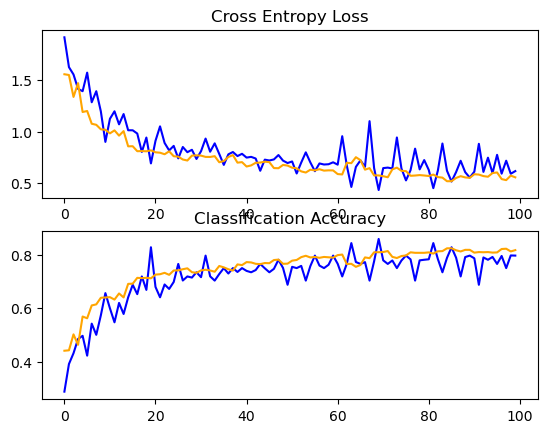

In [60]:
run_augmented_test_harness(save_name="augmentation")

## Sürekli İyileştirmeler - Toplu Normalleştirme (Batch Normalization)

In [16]:
def define_model():
    model = Sequential()

    # block 1
    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(rate=0.2))

    # block 2
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(rate=0.3))

    # block 3
    model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(rate=0.4))

    # Hidden Layers
    model.add(Flatten())
    model.add(Dense(units=128, activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dropout(rate=0.5))
    model.add(Dense(units=10, activation='softmax'))

    # compile model
    opt = SGD(momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

C:\Users\murat\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
C:\Users\murat\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
C:\Users\murat\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


> Test Accuracy: 86.410
Test Harness Run Time: 3186.143449306488 seconds (53.1023908217748 minutes)


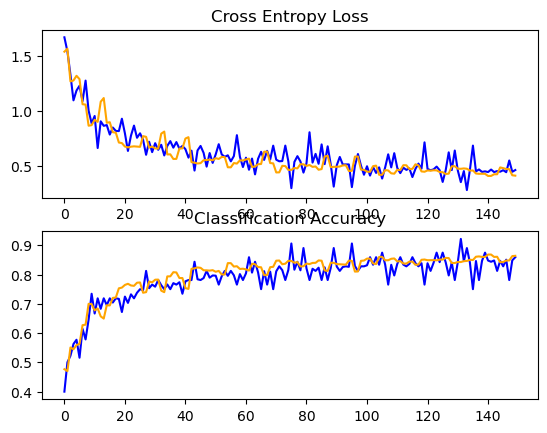

In [17]:
run_augmented_test_harness(epochs=150, save_name='sgd')

In [36]:
def run_example(opt, filename):
    img = image.load_img(filename, target_size=(32, 32))
    plt.imshow(img)
    plt.show()

    img = image.img_to_array(img)
    img = img.reshape(1, 32, 32, 3)
    img = img / 255.

    model = load_model(f'{opt}_final_model.h5')
    result = model.predict(img, batch_size=64)
    classes = np.argmax(result)
    print(result, classes)

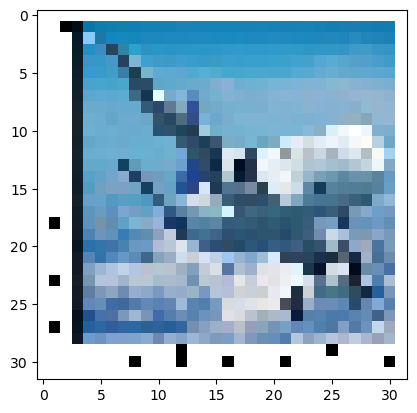

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
[[1.7795579e-01 4.5222768e-01 2.8532182e-04 9.1633754e-04 6.4123829e-05
  2.9386432e-05 1.6362565e-05 8.3052473e-05 1.3636006e-03 3.6705834e-01]] 1


In [35]:
run_example('sgd', 'images/indir.png')

In [37]:
def define_model():
    model = Sequential()

    # block 1
    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(rate=0.2))

    # block 2
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(rate=0.3))

    # block 3
    model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(rate=0.4))

    # Hidden Layers
    model.add(Flatten())
    model.add(Dense(units=128, activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dropout(rate=0.5))
    model.add(Dense(units=10, activation='softmax'))

    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

C:\Users\murat\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


> Test Accuracy: 86.860
Test Harness Run Time: 2874.4002161026 seconds (47.906670268376665 minutes)


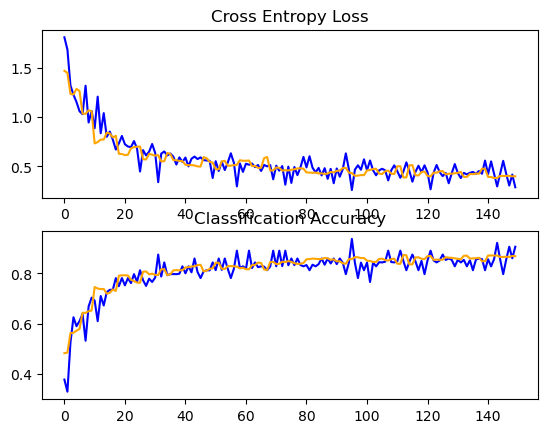

In [38]:
run_augmented_test_harness(epochs=150, save_name='adam')

## tf.keras.utils.to_categorical(y, num_classes)
### Bu fonksiyon, hedef değişkenin (etiketlerin) bir kategorik forma dönüştürülmesini sağlar. Özellikle, çok sınıflı sınıflandırma problemlerinde hedef değişkeni 'one-hot-encoding' formatına dönüştürmek için kullanılır. Dönüştürme mantığı, verilen hedef değişken dizisindeki her bir değeri, sınıf sayısı kadar uzunluğa sahip bir vektöre dönüştürür. Bu vektörde sadece ilgili sınıfın indeksi 1 olurken, diğer tüm indisler 0 olur. Bu işlem, sinir ağları gibi sınıflandırma algoritmaları için daha uygun bir girdi formatı sağlar ve sınıf bilgisini daha açık bir şekilde temsil eder.

## tf.keras.Sequential.evaluate(x, y, batch_size, verbose, sample_weight, steps, callbacks)
### Bu fonksiyon, belirtilen giriş veri kümesi üzerinde modelin kayıp (loss) değerini ve ölçülen metrik değerlerini hesaplar. Özellikle eğitilmiş bir modelin test veri kümesi üzerinde performansını değerlendirmek için yaygın olarak kullanılır.
### x: Giriş veri kümesi, Bu, özellik matrisi veya veri kümesi olabilir.
### y: Hedef (etiket) veri kümesi. Modelin tahminlerini karşılaştırmak için kullanılır. 
### batch_size: Değerlendirme işlemi sırasında kullanılacak toplu iş boyutu. Bu, bellek kullanımını kontrol etmek için kullanılır.
### verbose: Değerlendirme işlemi sırasında çıktının detay seviyesini belirler.
### sample_weight: Değerlendirme işlemi sırasında örnek ağırlıkları. Örnek ağırlıkları, farklı örneklerin model performansına olan katkılarını belirtmek için kullanılır. 
### steps: Bir epoch boyunca değerlendirme işleminin kaç adım süreceğini belirtir. Varsayılan olarak, bu değer 'none' olarak ayarlanır ve veri kümesindeki örnek sayısına bölünerek belirlenir.
### callbacks: Değerlendirme işlemi sırasında geri çağrıları belirtmek için kullanılır. Geri çağrılar, özel davranışları veya ek ölçümleri etkinleştirmek için kullanılabilir.

## keras.layers.Conv2D(filters, kernel_size, strides, padding, activation, input_shape, data_format, dilation_rate, use_bias)
### Bu fonksiyon, bir derin öğrenme modelinde evrişimli sinir ağı (convolutional neural network - cnn) katmanı oluşturmak için kullanılır. CNN'ler, özellikle görüntü işleme gibi alanlarda etkili olan ve özellik çıkarma sürecinde evrişim operasyonlarını kullanan sinir ağı mimarileridir. 'Conv2D()' fonksiyonu, bu evrişim katmanını tanımlamak için kullanılır.
### filters: Katmanda bulunacak filtre (kernel) sayısıdır. Bu, katmanın öğrenebileceği özellik sayısını belirler.
### kernel_size: Filtrelerin boyutunu belirtir. Örneğin, '(3, 3)' veya '(5, 5)' gibi bir boyut olabilir.
### strides: Evrişim işlemi sırasında filtrenin hareket edeceği adım sayısını belirtir. Varsayılan değer genellikle '(1, 1)' olarak ayarlanır, ancak daha büyük adımlar kullanarak boyutu küçültmek için kullanılabilir.
### padding: Evrişim işlemi sırasında kenar doldurma (padding) stratejisini belirtir. 'valid' (kenar doldurma yapılmaz) veya 'same' (giriş ve çıkış boyutları aynı olacak şekilde kenar doldurma yapılır) olabilir.
### activation: Katmanda kullanılacak aktivasyon fonksiyonunu belirtir. Örneğin, 'relu', 'sigmoid', 'tanh' gibi.
### input_shape: İlk katman olduğunda giriş veri tensörünün şeklini belirtir. Bu, (yükseklik, genişlik, kanal) şeklinde olmalıdır.
### data_format: Veri formatını belirtir. 'channel_last' (varsayılan) veya 'channel_first' olabilir.
### dilation_rate: Dilation (genişletme) oranını belirtir. Dilation, filtrenin boyutunu artırarak daha geniş bir alanı kapsamasıni sağlar.
### use_bias: Bias kullanılıp kullanılmayacağını belirtir. Varsayılan olarak 'True''dur.

## keras.layers.MaxPooling2D(pool_size, strides, padding, data_format)
### Bu fonksiyon, bir derin öğrenme modelinde maksimum havuzlama (max pooling) katmanı oluşturmak için kullanılır. Max pooling, evrişimli sinir ağı (convolutional neural network - cnn) mimarilerinde sıkça kullanılan bir tekniktir. MaxPooling2D katmanı, giriş verisinin boyutunu azaltmak ve özelliklerin örtüşmesini azaltarak özellik haritasının boyutunu küçültmek için kullanılır.
### pool_size: Havuzlama penceresinin boyutunu belirtir. Örneğin '(2, 2)' gibi bir boyut olabilir. Bu, maksimum havuzlama işleminin uygulanacağı pencerenin boyutunu belirler. 
### strides: Havuzlama işlemi sırasında pencerenin hareket edeceği adım sayısını belirtir. Varsayılan değer genellikle '(2, 2)' olarak ayarlanır.
### padding: Havuzlama işlemi sırasında kenar doldurma (padding) stratejisini belirtir. 'valid' (kenar doldurma yapılmaz) veya 'same' (giriş ve çıkış boyutları aynı olacak şekilde kenar doldurma yapılır) olabilir.
### data_format: Veri formatını belirtir. 'channels_last' (varsayılan) veya 'channels_first' olabilir.

## keras.layers.Dropout(rate, noise_shape, seed)
### Bu fonksiyon, overfittingi azaltmak için kullanılan bir regularizasyon tekniği olan dropout'u uygulamak için kullanılır. Dropout, ağın her bir eğitim örneğinde, belirli bir olasılıkla rastgele seçilen bir kısmını 'bırakarak' (de-aktive ederek) ağı güçlendirir. Bu, ağın aşırı uyum (overfitting) yapmasını önlemeye yardımcı olur. 
### rate: Bırakma oranını belirtir. Bu, 0 ile 1 arasında bir değer olmalıdır.
### noise_shape: Opsiyonel olarak belirtilen, bırakma işleminin uygulanacağı tensör boyutlarını belirtir. Bu genellikle özellikle karmaşık yapıya sahip ağlar için kullanılır. 
### seed: Rastgele sayı üretiminde kullanılan bir tohum değeri belirtir. Bu, tekrarlanabilirliği sağlamak için kullanılır.

## keras.layers.BatchNormalization(axis, momentum, epsilon, center, scale, beta_initializer, gamma_initializer, moving_mean_initializer, moving_variance_initializer)
### Bu fonksiyon, derin öğrenme modellerinde eğitim sırasında ağın daha hızlı ve daha istikrarlı bir şekilde öğrenmesini sağlamak için kullanılan bir normalleştirme tekniği olan toplu normalleştirmeyi (Batch Normalization) uygulamak için kullanılır. Toplu normalleştirme, her bir mini-batch'teki giriş verilerinin ortalamasını ve varyansını sıfır ortalamalı ve birim varyanslı bir dağılıma dönüştürerek çalışır. Bu, ağın daha istikrarlı bir şekilde öğrenmesini sağlar ve eğitim sürecini hızlandırır. Ayrıca, ağın daha derin olmasına izin vererek aşırı uyumu (overfitting) azaltmaya da yardımcı olabilir.
### axis: Normalizasyonun uygulanacağı ekseni belirtir. Genellikle, özelliklerin olduğu son eksen belirtilir. Varsayılan değer olarak '-1' kullanılır.
### momentum: Yerel ortalama ve varyansın güncellenmesi sırasında mevcut değer ile yeni hesaplanan değer arasındaki ağırlığı belirler. Genellikle, '0.99' veya benzeri bir değer kullanılır.
### epsilon: Sıfıra bölme hatasını önlemek için eklenen küçük bir sayıdır. Genellikle '1e-3' veya benzeri bir değer kullanılır.
### center: Eğer 'True' ise, normalleştirme sonrası ortalama, 'False' ise 0 olur.
### scale: Eğer 'True' ise, normalleştirme sonrası birim varyans, 'False' ise 1 olur.
### beta_initializer: Öteleme (bias) parametresinin başlangıç değerini belirler. Varsayılan olarak 'zeros' kullanılır.
### gamma_initializer: Ölçekleme (scale) parametresinin başlangıç değerini belirler. Varsayılan olarak 'ones' kullanılır.
### moving_mean_initializer: Yerel ortalamanın başlangıç değerini belirler. Varsayılan olarak 'zeros' kullanılır.
### moving_variance_initializer: Yerel varyansın başlangıç değerini belirler. Varsayılan olarak 'ones' kullanılır.